<a href="https://colab.research.google.com/github/He-ya/freeCodeCamp/blob/master/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4. 暢銷曲密碼

**我們想問的問題：暢銷曲中是不是有某種密碼使他們這麼高人氣?**

-> 使用jieba與文字雲 探索文本主題 (歌詞文本)

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import jieba.analyse
import codecs
#文字雲
from wordcloud import WordCloud

#### **讀資料集**
使用colab api 上傳檔案。請由
https://github.com/smalloshin/mirror-related-news-api/tree/master/v2.0/dict 下載所需檔案。
這裡我們要上傳一個字典檔(dict.txt.big)和停止字檔(stopwords.txt)到google colab。這邊有一個moe.dict，是我把萌典上面的字詞收集起來的字典當。可以當成dict.txt.big的替代檔案。


In [0]:
from google.colab import files
uploaded = files.upload()

Saving msyh.ttf to msyh.ttf


## 設定為繁中字典

這邊，我們可以利用jieba.set_dictionary()來設定字典檔，另外，停止字可以用jieba.analyse.set_stop_words()。

In [0]:
jieba.set_dictionary("dict.txt.big")

#jieba.load_userdict('moe.dict')
jieba.analyse.set_stop_words('stopping_words.dict')
#tfidf_20 = partial(jieba.analyse.extract_tags, topK=10, withWeight=True)

## 1. 透過 tf-idf 原理，取每首歌的前10大重要的tag (共33首歌)

In [0]:
import io
with io.open("lyrics.txt", "r", encoding="utf-8") as f1:
    for line in f1:
      
        words = jieba.analyse.extract_tags(line,10)
        print(",".join(words))
f1.close()

Building prefix dict from /content/dict.txt.big ...


Dumping model to file cache /tmp/jieba.u501edca284da514cb68b53a20324f4e3.cache
Loading model cost 1.819 seconds.
Prefix dict has been built succesfully.


時間,倒退,真的
歲月,悠悠的,回不去,退回

也許,終點,真的,世界
舉起,回憶,一杯


如果說,選出,畫面,青春,代表
浮現,那滴,眼淚,藍天,畢業,那片,那年
一張,邊哭邊,還要,擁抱
可愛,可憐,懷念,可歌可泣

懷念,不談,條件
回憶,衝破,衝出,歲月,考卷,眼前
流著,喝著,操場,汽水,汗水
說好,無論如何,未來,世界

未來,世界
身邊

諾亞方舟,堅強,友情,誓言
望著,永遠,視線,海面,模糊

時間,倒退,真的
歲月,悠悠的,回不去,退回

也許,終點,真的,世界
舉起,回憶,一杯


四輪,手錶,單眼
發現,不了,不到
宿醉,認命,宿命,人生,只好,只能
笑點,哭點,沒成,熟點,剩下

幻滅,一場,磨練,幻想,成熟
夢想,越磨,不見,小到
流淚,有時候,眼淚
他會,開個,同學會,期待


沒睡,電話,沒電,心情,孩子

天空
光陰,滄海桑田,遠走高飛,力氣

時間,倒退,真的
歲月,悠悠的,回不去,退回
也許,終點,真的,世界
舉起,回憶,一杯

時間,倒退,真的
歲月,悠悠的,回不去,退回
也許,終點,真的,世界
舉起,回憶,一杯

終究會,昨天
走過,人間,匆匆,一回,一生


說出,沒說,感謝,一杯
永遠,萬歲,一杯


時間,回來
懷念,來到


## 2. 把所有歌的 10 大 tags 再取前 N 個tags，N 可自行決定，此處先取 N = 15 做示範 print 出
- 文章當中是取 N = 200

In [0]:
with open("lyrics.txt", "rb") as f2:
    for line in f2:
        tags = jieba.analyse.extract_tags(line,15) #取Ｎ個tags
        print(",".join(tags))
f2.close()


時間,倒退,真的
歲月,悠悠的,回不去,退回

也許,終點,真的,世界
舉起,回憶,一杯


如果說,選出,畫面,青春,代表
浮現,那滴,眼淚,藍天,畢業,那片,那年
一張,邊哭邊,還要,擁抱
可愛,可憐,懷念,可歌可泣

懷念,不談,條件
回憶,衝破,衝出,歲月,考卷,眼前
流著,喝著,操場,汽水,汗水
說好,無論如何,未來,世界

未來,世界
身邊

諾亞方舟,堅強,友情,誓言
望著,永遠,視線,海面,模糊

時間,倒退,真的
歲月,悠悠的,回不去,退回

也許,終點,真的,世界
舉起,回憶,一杯


四輪,手錶,單眼
發現,不了,不到
宿醉,認命,宿命,人生,只好,只能
笑點,哭點,沒成,熟點,剩下

幻滅,一場,磨練,幻想,成熟
夢想,越磨,不見,小到
流淚,有時候,眼淚
他會,開個,同學會,期待


沒睡,電話,沒電,心情,孩子

天空
光陰,滄海桑田,遠走高飛,力氣

時間,倒退,真的
歲月,悠悠的,回不去,退回
也許,終點,真的,世界
舉起,回憶,一杯

時間,倒退,真的
歲月,悠悠的,回不去,退回
也許,終點,真的,世界
舉起,回憶,一杯

終究會,昨天
走過,人間,匆匆,一回,一生


說出,沒說,感謝,一杯
永遠,萬歲,一杯


時間,回來
懷念,來到


## 3. 文字雲呈現
- WordCloud Module 功能
- stopwords 停用字調整
- 存檔

In [0]:
text = open("lyrics.txt").read()
print(text)


會不會 有一天 時間真的能倒退
退回 你的我的 回不去的 悠悠的歲月

也許會 有一天 世界真的有終點
也要和你舉起回憶釀的甜 和你再乾一杯


如果說 要我選出 代表青春 那個畫面
浮現了 那滴眼淚 那片藍天 那年畢業
那一張 邊哭邊笑 還要擁抱 是你的臉
想起來 可愛可憐 可歌可泣 可是多懷念

懷念總是 突然懷念 不談條件
當回憶 衝破考卷 衝出歲月 在我眼前
我和你 流著汗水 喝著汽水 在操場邊
說好了 無論如何 一起走到 未來的世界

現在就是 那個未來 那個世界
為什麼 你的身邊 我的身邊 不是同一邊

友情曾像 諾亞方舟 堅強誓言
只是我 望著海面 等著永遠 模糊了視線

會不會 有一天 時間真的能倒退
退回 你的我的 回不去的 悠悠的歲月

也許會 有一天 世界真的有終點
也要和你舉起回憶釀的甜 和你再乾一杯


這些年 買了四輪 買了手錶 買了單眼
卻發現 追不到的 停不了的 還是那些
人生是 只有認命 只能宿命 只好宿醉
只剩下 高的笑點 低的哭點 卻沒成熟點

成熟就是 幻想幻滅 一場磨練
為什麼 只有夢想 越磨越小 小到不見
有時候 好想流淚 好想流淚 卻沒眼淚
期待會 你會不會 他會不會 開個同學會

他在等你 你在等我 我在等誰
又是誰 孩子沒睡 電話沒電 心情沒準備

天空不斷 黑了又亮 亮了又黑
那光陰 滄海桑田 遠走高飛 再沒力氣追

會不會 有一天 時間真的能倒退
退回 你的我的 回不去的 悠悠的歲月
也許會 有一天 世界真的有終點
也要和你舉起回憶釀的甜 和你再乾一杯

會不會 有一天 時間真的能倒退
退回 你的我的 回不去的 悠悠的歲月
也許會 有一天 世界真的有終點
也要和你舉起回憶釀的甜 和你再乾一杯

終究會 有一天 我們都變成昨天
是你 陪我走過 一生一回 匆匆的人間

有一天 就是今天 今天就是有一天
說出一直沒說 對你的感謝 和你再乾一杯
再乾一杯永遠 喝了就能萬歲 歲歲和年年


＊時間都停了 他們都回來了
懷念的人啊 等你的來到


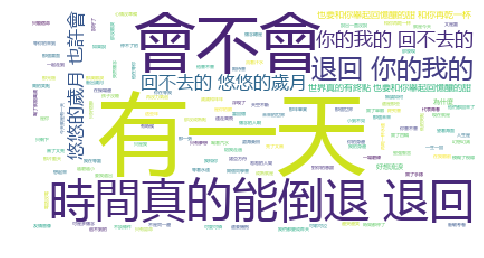

In [0]:
# 讀取欲透過文字雲計算詞頻的檔案

# 建立停用字
#stopwords = {}.fromkeys(["沒有","一個","什麼","那個"])  

wc = WordCloud(#font_path="NotoSerifCJKtc-Black.otf", #設置字體
               font_path ="msyh.ttf",
               background_color="white", #背景顏色
               max_words = 2000 , #文字雲顯示最大詞數
               stopwords=stopwords) #停用字詞

# 產生文字雲
wc.generate(text)

# 視覺化
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 100)
plt.show()

# 存檔
wc.to_file("wordcloud1.jpg")

## 討論：文字雲針對不同程度資料處理 part
- 原歌詞檔案（未斷詞）
- 原歌詞檔案（有斷詞）
- 每首歌取前 10 大關鍵字（共 330 個）
- 最終關鍵字（從上述 330 個挑 200 個）

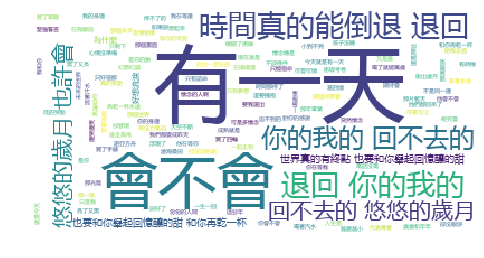

In [0]:
#原歌詞檔案_未斷詞
text = open("lyrics.txt").read()
stopwords = {}.fromkeys(["沒有","一個","什麼","那個"])  

wc = WordCloud(font_path="msyh.ttf", #設置字體
               background_color="white", #背景顏色
               max_words = 2000 , #文字雲顯示最大詞數
               stopwords=stopwords) #停用字詞
wc.generate(text)
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 100)
plt.show()

# 存檔
wc.to_file("wordcloud_test1.jpg")

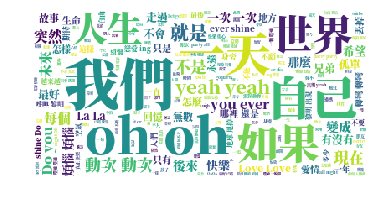

In [0]:
#已斷詞
text = open("lyrics/lyrics_cut_test1.dataset").read()
stopwords = {}.fromkeys(["沒有","一個","什麼","那個"])  

wc = WordCloud(font_path="NotoSerifCJKtc-Black.otf", #設置字體
               background_color="white", #背景顏色
               max_words = 2000 , #文字雲顯示最大詞數
               stopwords=stopwords) #停用字詞
wc.generate(text)
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 100)
#plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.show()

# save
wc.to_file("lyrics/wordcloud_test2.jpg")

In [0]:
# 把所有歌的10大tags取tags，也就是從330個tags (33*10) 精煉成取100個tags
wtags_all = codecs.open("lyrics/lyrics_tags_combine.txt", "w", "utf-8")
with open("lyrics/lyrics_tags.txt", "rb") as f3:
    for line in f3:
        tags = jieba.analyse.extract_tags(line,200)
        wtags_all.write(" ".join(tags))
f3.close()

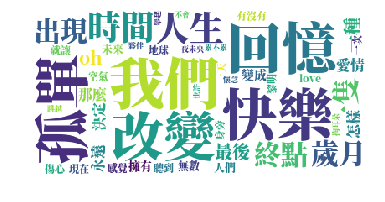

In [0]:
#最終關鍵字
text = open("lyrics/lyrics_tags_combine.txt").read()
stopwords = {}.fromkeys(["沒有","一個","什麼","那個"])  

wc = WordCloud(font_path="NotoSerifCJKtc-Black.otf", #設置字體
               background_color="white", #背景顏色
               max_words = 2000 , #文字雲顯示最大詞數
               stopwords=stopwords) #停用字詞
wc.generate(text)
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 100)
#plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.show()

# save
wc.to_file("lyrics/wordcloud_test4.jpg")